In [34]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
# Get all file names in current folder
files = os.listdir(".")

In [36]:
# Concatenate all dataframes in a single one
df = pd.concat([pd.read_csv(f) for f in files if f.endswith(".csv")])
df = df.drop(columns=["dataset"])

In [37]:
models = df["method"].unique()
models = ["fmgp", "valla", "lla last_layer full", "lla last_layer kron", "ella"]
labels = ["FMGP", "VaLLA", "LLA* (full)", "LLA* (kron)", "ELLA"]
print("Models: ", models)

Models:  ['fmgp', 'valla', 'lla last_layer full', 'lla last_layer kron', 'ella']


In [38]:
def std(x):
    return np.std(x)

In [39]:
# Group by "method" and "resnet" and compute average and std
df = df.groupby(["method"]).agg(["mean", std])
df

RMSE            NLL                    Q-10           \
                         mean  std      mean           std      mean      std   
method                                                                          
ella                 9.316823  0.0  3.654598  1.876038e-07  0.119524  0.00000   
fmgp                 9.316823  0.0  3.503944  9.826487e-07  0.097598  0.00000   
lla last_layer full  9.316823  0.0  3.650762  4.440892e-16  0.127039  0.00000   
lla last_layer kron  9.316823  0.0  3.650762  4.440892e-16  0.127039  0.00000   
map                  9.316823  0.0  3.651018  4.440892e-16  0.125199  0.00000   
valla                9.316823  0.0  3.525701  5.263017e-04  0.106585  0.00027   

                         Q-20                Q-30            ...  \
                         mean       std      mean       std  ...   
method                                                       ...   
ella                 0.241410  0.000000  0.367500  0.000000  ...   
fmgp                 0.200353  0.000008  0.304242  0.000000  ...   
lla last_layer full  0.256672  0.000000  0.390839  0.000000  ...   
lla last_layer kron  0.256672  0.000000  0.390819  0.000000  ...   
map                  0.252160  0.000000  0.384195  0.000000  ...   
valla                0.212268  0.000135  0.321732  0.000266  ...   

                       train_time                test_time            seed  \
                             mean          std        mean        std mean   
method                                                                       
ella                  7233.333607    99.444909   50.100408   1.102989  2.0   
fmgp                   899.571155    49.948554    3.759351   0.089756  2.0   
lla last_layer full     16.631068     1.046318    4.614471   0.265686  2.0   
lla last_layer kron     34.875899     1.394719    4.977709   0.259592  2.0   
map                     35.665680     0.627864    2.585134   0.037966  2.0   
valla                28663.757979  4321.546665  148.237156  30.136908  2.0   

                              sigma_noise      prior_precision       
                          std        mean  std            mean  std  
method                                                               
ella                 1.414214    0.800000  0.0        0.001000  0.0  
fmgp                 1.414214         NaN  NaN             NaN  NaN  
lla last_layer full  1.414214    0.851706  0.0        8.778252  0.0  
lla last_layer kron  1.414214    0.851697  0.0        9.582118  0.0  
map                  1.414214    0.700000  0.0             NaN  NaN  
valla                1.414214         NaN  NaN             NaN  NaN  

[6 rows x 36 columns]

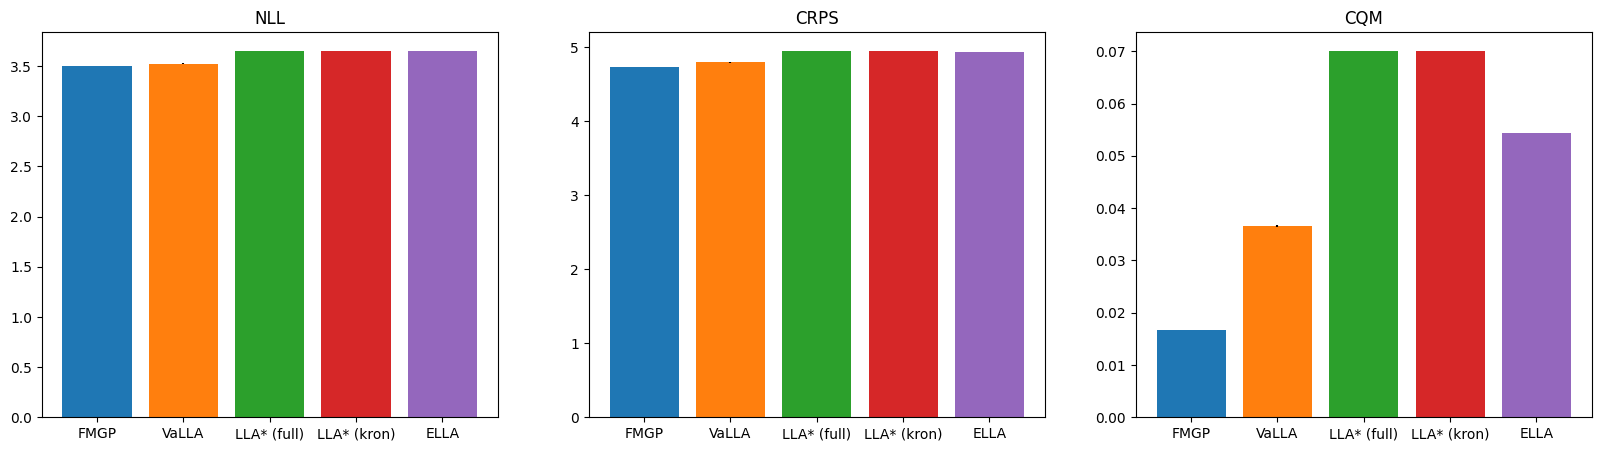

In [40]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
# Plot NLL in axis 0
for j, model in enumerate(models):
    nll = df.loc[model, ("NLL", "mean")]
    std = df.loc[model, ("NLL", "std")]
    axis[0].bar(j, nll, yerr=std, label=labels[j], color=f"C{j}")
    axis[0].set_title("NLL")
    axis[0].set_xticks(range(len(models)))
    axis[0].set_xticklabels(labels)

    # Plot CRPS
    crps = df.loc[model, ("CRPS", "mean")]
    std = df.loc[model, ("CRPS", "std")]
    axis[1].bar(j, crps, yerr=std, label=labels[j], color=f"C{j}")
    axis[1].set_title("CRPS")
    axis[1].set_xticks(range(len(models)))
    axis[1].set_xticklabels(labels)

    # Plot Q
    q = df.loc[model, ("CQM", "mean")]
    std = df.loc[model, ("CQM", "std")]
    axis[2].bar(j, q, yerr=std, label=labels[j], color=f"C{j}")
    axis[2].set_title("CQM")
    axis[2].set_xticks(range(len(models)))
    axis[2].set_xticklabels(labels)

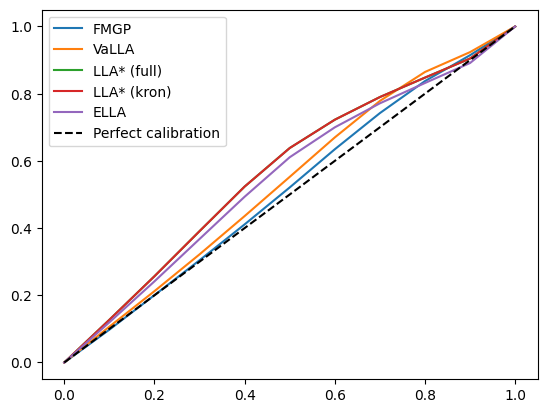

In [41]:
# Get Q-10, Q-20.. columns in array
for i, model in enumerate(models):
    Q = []
    Q_std = []
    for q in range(10, 100, 10):
        q = f"Q-{q}"
        q_values = df.loc[model, (q, "mean")]
        Q.append(q_values)
        q_std = df.loc[model, (q, "std")]
        Q_std.append(q_std)
    plt.plot(np.arange(0, 1.1, 0.1), [0, *Q, 1], label=labels[i])
    plt.fill_between(
        np.arange(0, 1.1, 0.1),
        [0, *Q, 1],
        [0, *(np.array(Q) - np.array(Q_std)), 1],
        alpha=0.2,
    )
plt.plot(
    np.arange(0, 1.1, 0.1),
    np.arange(0, 1.1, 0.1),
    label="Perfect calibration",
    linestyle="--",
    color="black",
)
plt.legend()

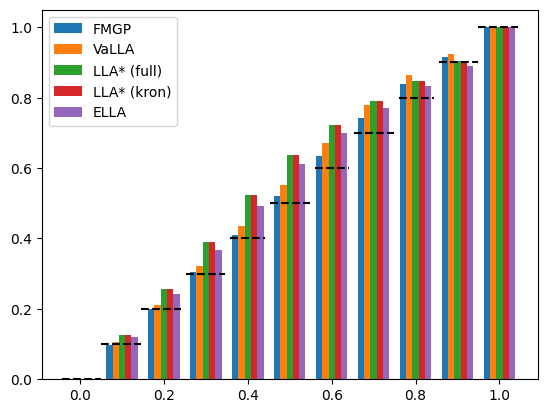

In [42]:
# Get Q-10, Q-20.. columns in array
sep = 0.015
er = np.arange(-2, 3, 1) * sep
for i, model in enumerate(models):
    Q = []
    Q_std = []
    for q in range(10, 100, 10):
        q = f"Q-{q}"
        q_values = df.loc[model, (q, "mean")]
        Q.append(q_values)
        q_std = df.loc[model, (q, "std")]
        Q_std.append(q_std)
    b = plt.bar(np.arange(0, 1.1, 0.1) + er[i], [0, *Q, 1], width=sep, label=labels[i])
plt.axhline(0.0, 0.04, 0.12, linestyle="--", color="black")
plt.axhline(0.1, 0.12, 0.20, linestyle="--", color="black")
plt.axhline(0.2, 0.2, 0.28, linestyle="--", color="black")
plt.axhline(0.3, 0.29, 0.37, linestyle="--", color="black")
plt.axhline(0.4, 0.38, 0.45, linestyle="--", color="black")
plt.axhline(0.5, 0.46, 0.54, linestyle="--", color="black")
plt.axhline(0.6, 0.55, 0.62, linestyle="--", color="black")
plt.axhline(0.7, 0.63, 0.71, linestyle="--", color="black")
plt.axhline(0.8, 0.72, 0.79, linestyle="--", color="black")
plt.axhline(0.9, 0.80, 0.88, linestyle="--", color="black")
plt.axhline(1.0, 0.88, 0.96, linestyle="--", color="black")

plt.legend()

In [43]:
# Concatenate all dataframes in a single one
nll = []
crps = []
Q = []
for i in range(5):
    nll.append(np.loadtxt(f"ella_{i}_nll.txt"))
    crps.append(np.loadtxt(f"ella_{i}_crps.txt"))
    Q.append(np.loadtxt(f"ella_{i}_cqm.txt"))
nll = np.array(nll)
crps = np.array(crps)
Q = np.array(Q)

nll_mean = np.mean(nll, axis=0)
nll_std = np.std(nll, axis=0) / np.sqrt(5)
crps_mean = np.mean(crps, axis=0)
crps_std = np.std(crps, axis=0) / np.sqrt(5)
Q_mean = np.mean(Q, axis=0)
Q_std = np.std(Q, axis=0) / np.sqrt(5)

In [44]:
evaluations = np.loadtxt("ella_0_evaluations.txt")

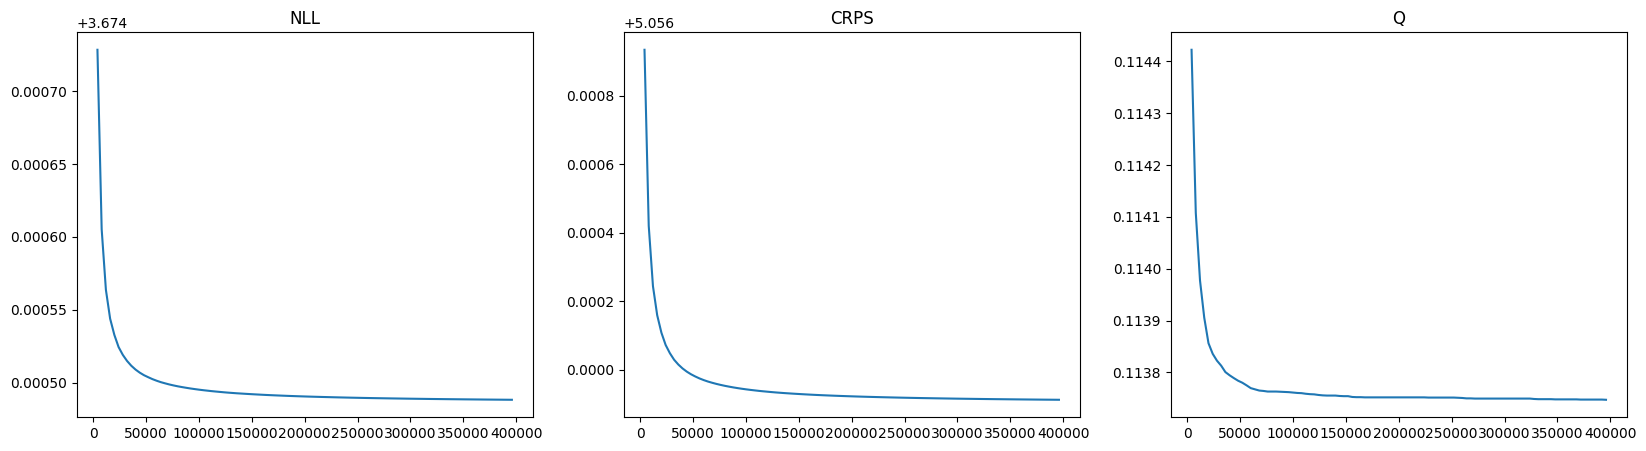

In [45]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
axis[0].plot(evaluations[1:], nll_mean[1:])
axis[0].set_title("NLL")

axis[1].plot(evaluations[1:], crps_mean[1:])
axis[1].set_title("CRPS")

axis[2].plot(evaluations[1:], Q_mean[1:])
axis[2].set_title("Q")

plt.show()